# Tweet extraction

In this part we extract the tweets for the [13] in the report and form JSON files.

To run this code you need an API key from twitter. You have to create file *twitter_api.txt* in the *code* folder of the repository. Then fill out the following JSON and paste it into the *twitter_api.txt*:
```
{"key": "your-key-here",
"secret-key": "your-secret-key-here",
"bearer-token": "your-bearer-token-here",
"access-token": "your-access-token-here",
"access-token-secret": "your-access-token-secret-here"}
```

You also need to create a folder named *filtered* in the data folder of this repository.

In [1]:
def custom_tweet(tweet_id, tweet_text, entities, label):
    new_d = dict()
    new_d["id"] = tweet_id
    new_d["text"] = tweet_text
    new_d["entities"] = entities
    new_d["label"] = label
    return new_d


In [2]:
import tweepy
import pandas as pd
import numpy as np
import json
import time
from tqdm.notebook import tqdm

In [3]:
with open('twitter_api.txt') as f:
     data = json.load(f)

In [4]:
# initialize tweepy
consumer_key = data["key"]
consumer_secret = data["secret-key"]

access_token = data["access-token"]
access_token_secret = data["access-token-secret"]

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
# reads df
df = pd.read_csv("data/filtered/abusive_hateful_spam_normal.csv")
df.head()

,tweet_id,maj_label
0,849667487180259329,abusive
1,850490912954351616,abusive
2,848791766853668864,abusive
3,848306464892604416,abusive
4,850010509969465344,normal


In [6]:
df = df[df["maj_label"] != "normal"]

labels = dict(zip(df["tweet_id"].to_numpy().astype(str), df["maj_label"]))
labels

{'849667487180259329': 'abusive',
 '850490912954351616': 'abusive',
 '848791766853668864': 'abusive',
 '848306464892604416': 'abusive',
 '850433664890544128': 'hateful',
 '847529600108421121': 'abusive',
 '848619867506913282': 'abusive',
 '850411934205845504': 'abusive',
 '848325397985071104': 'abusive',
 '849087242987593728': 'abusive',
 '850449456445235200': 'hateful',
 '850100742035836929': 'hateful',
 '847945888995708928': 'hateful',
 '850577240127623169': 'abusive',
 '849811213416574976': 'abusive',
 '849282894682050564': 'abusive',
 '848491429517295616': 'abusive',
 '847972153727299584': 'abusive',
 '850455815001522176': 'abusive',
 '847534226413105152': 'abusive',
 '847804507367100416': 'hateful',
 '849562231129993216': 'abusive',
 '848317802092130306': 'abusive',
 '850814012753403907': 'abusive',
 '848377830996148224': 'abusive',
 '847851483571814400': 'abusive',
 '848813568820518913': 'abusive',
 '848668638869671939': 'abusive',
 '848638037231906817': 'abusive',
 '850090319165

In [7]:
ids_to_request = df["tweet_id"].to_numpy().astype(str).tolist()
ids_to_request

['849667487180259329',
 '850490912954351616',
 '848791766853668864',
 '848306464892604416',
 '850433664890544128',
 '847529600108421121',
 '848619867506913282',
 '850411934205845504',
 '848325397985071104',
 '849087242987593728',
 '850449456445235200',
 '850100742035836929',
 '847945888995708928',
 '850577240127623169',
 '849811213416574976',
 '849282894682050564',
 '848491429517295616',
 '847972153727299584',
 '850455815001522176',
 '847534226413105152',
 '847804507367100416',
 '849562231129993216',
 '848317802092130306',
 '850814012753403907',
 '848377830996148224',
 '847851483571814400',
 '848813568820518913',
 '848668638869671939',
 '848638037231906817',
 '850090319165050880',
 '850387833751650305',
 '850590552856948737',
 '848610228967010305',
 '847394619029467136',
 '848074037540597760',
 '848992241981018112',
 '849636831033532417',
 '848866727429455872',
 '849429355583426561',
 '850311262504407044',
 '848600351381098496',
 '848455845021196288',
 '850672203372916736',
 '850334784

Before running the code you need to create *init.txt* in the *code* folder of this repository. The file must contain a single line with integer *0*, no spaces or any other signs.

In [10]:
# set init.txt to 0 before running this code if you want to run it from start

# read starting point
with open('init.txt', 'r') as fp:
    start = fp.read()
fp.close() 
start = int(start)
print(start)

0


In [11]:
for i in tqdm(range(start, int(len(ids_to_request)/100))):
    # get tweets
    tweets = api.statuses_lookup(ids_to_request[i*100:(i+1)*100])
    
    # get dict
    custom_tweets = dict()
    for tweet in tweets:
        custom = custom_tweet(tweet.id_str, tweet.text, tweet.entities, labels[tweet.id_str])
        custom_tweets[tweet.id_str] = custom
    
    # save them
    if len(tweets) > 0:
        f = open(f'data/filtered/abusive_hateful_spam_normal/{i:03d}.json', "w")
        json.dump(custom_tweets, f)
        f.close()
    
    # update init
    f = open('init.txt', 'w')
    f.write(str(i+1))
    f.close()
    
    

  0%|          | 0/271 [00:00<?, ?it/s]

In [12]:
int(len(ids_to_request)/100)

271

# Merging files

The previous code generated a lot of smaller files as the extraction extracts tweets in bathes. This part merge files into one.

In [13]:
import os
import json

In [14]:
all_tweets = dict()

for fn in os.listdir("data/filtered/abusive_hateful_spam_normal/"):
    f = open(f"data/filtered/abusive_hateful_spam_normal/{fn}", "r")
    data = json.load(f)
    all_tweets = {**all_tweets, **data}
    
# dump merged
f = open(f'data/filtered/abusive_hateful_spam_normal.json', "w")
json.dump(all_tweets, f)
f.close()

# Distribution of the tweets

In [15]:
set(labels.values())

{'abusive', 'hateful', nan, 'spam'}

In [16]:
counter = [0] * 4   # racism, sexism, both, benevolent_sexism

In [17]:
for v in list(all_tweets.values()):
    label = v["label"]
    if label == "abusive":
        counter[0] = counter[0] + 1
    elif label == "hateful":
        counter[1] = counter[1] + 1
    elif label == "spam":
        counter[2] = counter[2] + 1
    elif label == "nan":
        counter[3] = counter[3] + 1

        
print(counter)
print(len(all_tweets) - sum(counter))

[4227, 1752, 7782, 0]
3


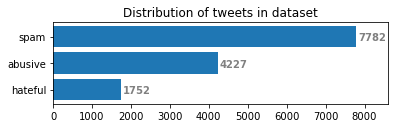

In [18]:
import matplotlib.pyplot as plt
import numpy as np

counter = np.array(counter)

idx = np.argsort(counter)

x = np.array(["abusive", "hateful", "spam", "nan"])[idx]
y = counter[idx]

x = x[1:]
y = y[1:]

fig, ax = plt.subplots(figsize = (6,1.5))
ax.barh(x,y)
ax.set_xlim([0, 8600])
for i, v in enumerate(y):
    ax.text(v + 50, i - 0.15, str(v), color="gray", fontweight='bold')
plt.title("Distribution of tweets in dataset")
plt.show()

# Tweet examples

In [19]:
i = 0
target = "spam"
for id, tweet in all_tweets.items():
    if tweet["label"] == target:
        print(tweet["text"])
        i = i + 1
        
    if i > 20:
        break

JAP Battle (EXPLICIT) - "Crazy Ex-Girlfriend" https://t.co/65vwI3oOL4

Awe Snap, Scarsdale!!! https://t.co/65vwI3oOL4
@thorsen1nk THAT IS A FUCKING MOVIE! https://t.co/ywG7IZywKk
Just watched @chicken_film woahhhhh break my fucking heart! RIP Fiona  @Freddie_Machin
RT @OnlyLookAtMino: [!!] #WINNER trending on Melon Search🍈
#FateNumberFor
#ReallyReally
💚💜💛💙 https://t.co/obAbwUbvaQ
@MusclyBabies @DanTheDazzler @KidLykos @OBEYBrookes @ATTACKWrestling Something Something Idiot
RT @WINNERPHYG: [!!!] WINNER #1 trending on MelOn search https://t.co/B3tDZSQXP7
Push your cock inside me,i am a bad police,punish me https://t.co/VM5hiyM5cJ
bulletsandbeesboutique's video https://t.co/seZODCKUP7 I FUCKING WON AND I AM DYING!
RT @idkbutimariy: Me tweeting like I'm miserable knowing damn well I got the man of my dreams in my iMessages rn https://t.co/hO8rz2O6PN
Ant and Dick have nothing on this https://t.co/HrEmQynFd0 for nothing!!gets crap frm dump and pays a 1k to make shi… https://t.co/ncxRQTIJJG
R

In [20]:
i = 0
target = "abusive"
for id, tweet in all_tweets.items():
    if tweet["label"] == target:
        print(tweet["text"])
        i = i + 1
        
    if i > 20:
        break

fucks sake go away stupid anon — ^  https://t.co/8TQGyiKCVE
Damn dean just put Corbin to sleep. That Match Also Showed why It Was On Pre show. Boring as fuck
@TheRealCamerota THAT BEER BUYING FREAKING IDIOT THINKS TRUMP LEAKED IT TO NAIL RICE? ARE YOU KIDDING? AND SACRIFICE FLYNN. MUD IS APPROPO
what idiot called them antacids and not afterburners
RT @gogglepossum: Don't you hate people that put salt on their bag of dicks before even trying them?
You Worried About Somebody Bein Ugly... Bitch You Ugly...
Holy crap!! The biggest assclown of a mayor on @TuckerCarlson pulling race card!! Get his ass outta office!!! #draintheswamp
RT @dawseyslinstead: i just want to cry so fucking bad look at them https://t.co/FaxDU5fI3m
Yooooo vans got these sick ass velvet oxblood slip onnnnssssss 💦💦💦💦👅👅👅👅
RT @Kimberley1222: Disgusting. Insulting. Parks are NOT a charity. Give them a fucking budget, asshole.  @realDonaldTrump

#TheResistance
#…
RT @AdrianR1979: I swear every person that voted for tru💩 is 

In [23]:
i = 0
target = "hateful"
for id, tweet in all_tweets.items():
    if tweet["label"] == target:
        print(tweet["text"])
        i = i + 1
        
    if i > 50:
        break

RT @ayevonnn: bruh i fucking hate people like this 😤 https://t.co/dceEXQhnhq
@JayFoee_ just another dumbass bronco fan swear I hate this fanbase dawg 😭
I hate er chase because if the Bitch that works there she's literally evil
RT @mattmfm: I'm really fucking sick of watching the Republican Party be rewarded for flagrantly degrading our democracy.
Systems that don't allow you to change your email address... what the hell are you doing? Were you built by idiots?
@vappywave idiot that's not gonna work. you gotta put flame stickers on it to make it go faster
RT @nyctophil3: Pineapples do not belong on pizza. Y'all niggas are nasty.
Niggas keep talking about women wearing weave but be sick when a bitch up a fro on they ass. 😭
RT @GunnerStaal: "You see we should have traded Letang, he's always hurt"

            - Idiots
RT @arianam0lina: if you litter you're a bitch &amp; i hate you
RT @THESLUMPGOD: I Sampled Jaws 

Pull Up With The Pistol Make A Nigga Look So Dam Sick Like He Seen A Bitch 